# Taxi dataset

In [51]:
import pandas as pd
import seaborn as sns

### Чтение данных из файла

In [40]:
df = pd.read_csv('taxi.csv')

### Вывод данных, размер и информация о таблице

In [41]:
df.head()

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0


In [3]:
df.shape

(29101, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pickup_dt     29101 non-null  object 
 1   pickup_month  29101 non-null  object 
 2   borough       26058 non-null  object 
 3   pickups       29101 non-null  int64  
 4   hday          29101 non-null  object 
 5   spd           29101 non-null  float64
 6   vsb           29101 non-null  float64
 7   temp          29101 non-null  float64
 8   dewp          29101 non-null  float64
 9   slp           29101 non-null  float64
 10  pcp 01        29101 non-null  float64
 11  pcp 06        29101 non-null  float64
 12  pcp 24        29101 non-null  float64
 13  sd            29101 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 3.1+ MB


### Корректировка названия столбцов

In [5]:
def correct_columns(name):
    return name.replace(' ', '_')
df.rename(columns=correct_columns)

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp_01,pcp_06,pcp_24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,Jun,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29097,2015-06-30 23:00:00,Jun,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29098,2015-06-30 23:00:00,Jun,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29099,2015-06-30 23:00:00,Jun,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0


### Сумма всех поездок

In [21]:
df['pickups'].sum()

14265773

### Сумма всех поездок по районам

In [20]:
df.groupby('borough').agg({'pickups': 'sum'})

,pickups
borough,
Bronx,220047
Brooklyn,2321035
EWR,105
Manhattan,10367841
Queens,1343528
Staten Island,6957


### Район с минимальным количеством поездок

In [29]:
df.groupby('borough').agg({'pickups': 'sum'}).idxmin()

pickups    EWR
dtype: object

### Среднее количество поездок по районам в зависимости от дня недели

In [32]:
df.groupby(['borough', 'hday']).agg({'pickups': 'mean'})

pickups
borough       hday             
Bronx         N       50.771073
              Y       48.065868
Brooklyn      N      534.727969
              Y      527.011976
EWR           N        0.023467
              Y        0.041916
Manhattan     N     2401.302921
              Y     2035.928144
Queens        N      308.899904
              Y      320.730539
Staten Island N        1.606082
              Y        1.497006

### Сумма поездок по районам по месяцам

In [37]:
df.groupby(['pickup_month', 'borough'], as_index=False).agg({'pickups': 'sum'}).sort_values('pickups', ascending=False)

,pickup_month,borough,pickups
21,Jun,Manhattan,1995388
33,May,Manhattan,1888800
9,Feb,Manhattan,1718571
27,Mar,Manhattan,1661261
3,Apr,Manhattan,1648278
15,Jan,Manhattan,1455543
19,Jun,Brooklyn,482466
31,May,Brooklyn,476087
1,Apr,Brooklyn,378095
25,Mar,Brooklyn,346726


### Перевод температуры из Фаренгейтов в градусы Цельсия

In [39]:
def temp_to_celcius(dataframe):
    return (dataframe - 32) * 5/9
df['temp_C'] = temp_to_celcius(df['temp'])
df['temp_C']

0        -1.111111
1        -1.111111
2        -1.111111
3        -1.111111
4        -1.111111
           ...    
29096    23.888889
29097    23.888889
29098    23.888889
29099    23.888889
29100    23.888889
Name: temp_C, Length: 29101, dtype: float64

### Визуализация поездок по месяцам

<Axes: xlabel='pickup_month', ylabel='pickups'>

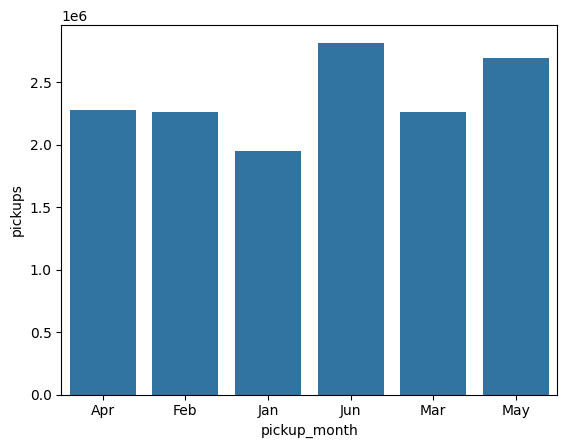

In [55]:
sns.barplot(x='pickup_month', y='pickups', data=df.groupby('pickup_month').agg({'pickups': 'sum'}).reset_index())